In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util
from hierarchy import *

# Finding Tree Path Covers

In [2]:
def draw_tree(tree, layout, draw_path=True):
    rooted_tree = nx.bfs_tree(tree, 0)
    
    # nx.draw_networkx_nodes(tree, pos=layout, node_size=4)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8, font_color="tab:red")
    
    if draw_path:
        path_cover=util.path_cover(tree)
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(rooted_tree, pos=layout)

### Test Tree 1 [(0,1)-weights]

In [28]:
test_tree = nx.read_graphml('test1.graphml', node_type=int)

0: (11.12174046994793, 0, 18, 2)
2: (0, 0.7977562074230161, None, None)
18: (9.431516803694882, 0.892467458830033, 8, 11)
8: (9.2136087981177, 0.12603851472739536, 1, 9)
11: (0, 0.09186949084978413, None, None)
1: (1.7432810981749651, 0.8381008122574674, 15, None)
9: (6.632226887685268, -0.22552858561678446, 19, 3)
15: (0.8864538053441008, 0.8568272928308645, 21, None)
3: (2.033408282585799, 0.4908051027631126, 24, 12)
4: (3.0535582336576352, 0.11258568403417335, 5, 16)
19: (0.2067345124482346, 0.8477207562304858, 23, None)
21: (0, 0.8864538053441008, None, None)
12: (1.3272090876829628, 0.3243095919924279, 14, None)
24: (0, 0.3818896029104081, None, None)
5: (0.6438187145933159, 0.5839485221388294, 7, 20)
16: (1.6085078673466766, 0.21728312957881357, 22, 10)
23: (0, 0.2067345124482346, None, None)
14: (0.9769508317917671, 0.35025825589119564, 6, None)
7: (0, 0.5737376856525619, None, None)
20: (0.044350567376415406, 0.025730461564338558, 17, None)
10: (0.6643525896073521, 0.4600428895

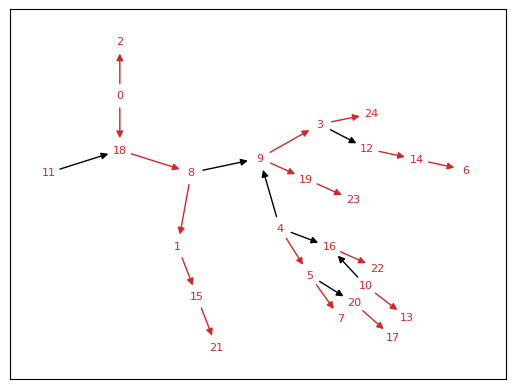

In [29]:
draw_tree(test_tree, hierarchyc_pos(tree, 0))

### Random tree with edge weights in [0,1)

In [3]:
n = 25
tree = nx.random_labeled_tree(n)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

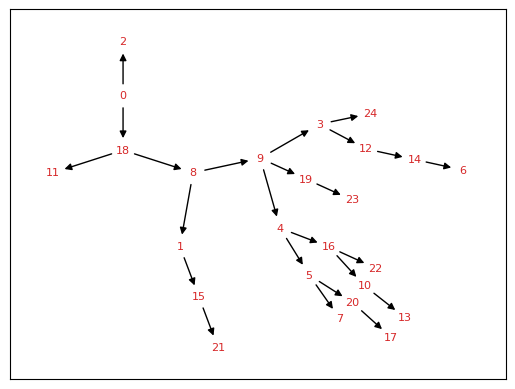

In [4]:
layout = hierarchyc_pos(tree, 0)
draw_tree(tree, layout, draw_path=False)

0: (11.12174046994793, 0, 18, 2)
2: (0, 0.7977562074230161, None, None)
18: (9.431516803694882, 0.892467458830033, 8, 11)
11: (0, 0.09186949084978413, None, None)
8: (9.2136087981177, 0.12603851472739536, 1, 9)
1: (1.7432810981749651, 0.8381008122574674, 15, None)
9: (6.632226887685268, -0.22552858561678446, 19, 3)
15: (0.8864538053441008, 0.8568272928308645, 21, None)
4: (3.0535582336576352, 0.11258568403417335, 5, 16)
19: (0.2067345124482346, 0.8477207562304858, 23, None)
3: (2.033408282585799, 0.4908051027631126, 24, 12)
21: (0, 0.8864538053441008, None, None)
5: (0.6438187145933159, 0.5839485221388294, 7, 20)
16: (1.6085078673466766, 0.21728312957881357, 22, 10)
23: (0, 0.2067345124482346, None, None)
12: (1.3272090876829628, 0.3243095919924279, 14, None)
24: (0, 0.3818896029104081, None, None)
7: (0, 0.5737376856525619, None, None)
20: (0.044350567376415406, 0.025730461564338558, 17, None)
10: (0.6643525896073521, 0.4600428895195655, 13, None)
22: (0, 0.48411238821975877, None, No

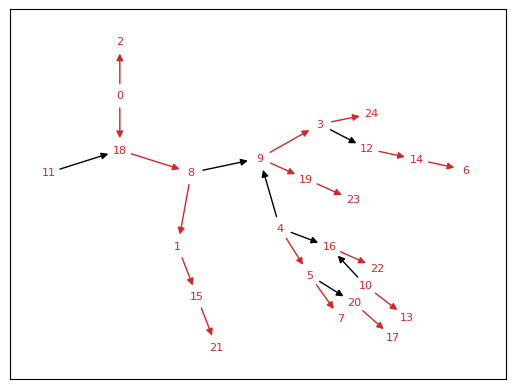

In [5]:
draw_tree(tree, layout)

In [6]:
nx.get_edge_attributes(tree, 'weight')

{(0, 2): 0.7977562074230161,
 (0, 18): 0.9843369496798171,
 (1, 15): 0.8568272928308645,
 (1, 8): 0.8381008122574674,
 (3, 12): 0.3243095919924279,
 (3, 9): 0.8151146947555405,
 (3, 24): 0.3818896029104081,
 (4, 5): 0.609678983703168,
 (4, 16): 0.6773260190983791,
 (4, 9): 0.3298688136129869,
 (5, 7): 0.5737376856525619,
 (5, 20): 0.025730461564338558,
 (6, 14): 0.9769508317917671,
 (8, 18): 0.12603851472739536,
 (8, 9): 0.26527651714632816,
 (9, 19): 0.8477207562304858,
 (10, 13): 0.6643525896073521,
 (10, 16): 0.4600428895195655,
 (11, 18): 0.09186949084978413,
 (12, 14): 0.35025825589119564,
 (15, 21): 0.8864538053441008,
 (16, 22): 0.48411238821975877,
 (17, 20): 0.044350567376415406,
 (19, 23): 0.2067345124482346}

### Unit edge weights

In [7]:
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

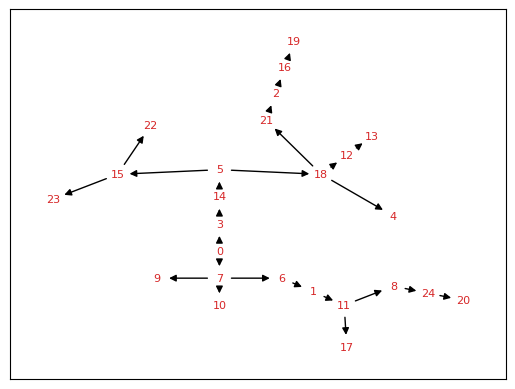

In [8]:
#ones_layout = nx.spring_layout(ones_tree)
ones_layout = hierarchyc_pos(ones_tree, 0)
draw_tree(ones_tree, ones_layout, draw_path=False)

0: (18, 0, 3, 7)
3: (10, 1, 14, None)
7: (7, 0, 10, 9)
14: (9, 1, 5, None)
9: (0, 1, None, None)
10: (0, 1, None, None)
6: (5, 1, 1, None)
5: (8, 1, 15, 18)
1: (4, 1, 11, None)
18: (6, 0, 12, 4)
15: (2, 0, 23, 22)
11: (4, 0, 8, 17)
4: (0, 1, None, None)
12: (1, 1, 13, None)
21: (3, 1, 2, None)
22: (0, 1, None, None)
23: (0, 1, None, None)
17: (0, 1, None, None)
8: (2, 1, 24, None)
13: (0, 1, None, None)
2: (2, 1, 16, None)
24: (1, 1, 20, None)
16: (1, 1, 19, None)
20: (0, 1, None, None)
19: (0, 1, None, None)
Path edges: [(0, 3), (3, 14), (7, 10), (7, 9), (14, 5), (6, 1), (18, 12), (18, 4), (15, 23), (15, 22), (11, 8), (11, 17), (12, 13), (21, 2), (8, 24), (2, 16), (24, 20), (16, 19)]
Total path length (x(root)): 18
Total path length (actual): 18
Difference: 0


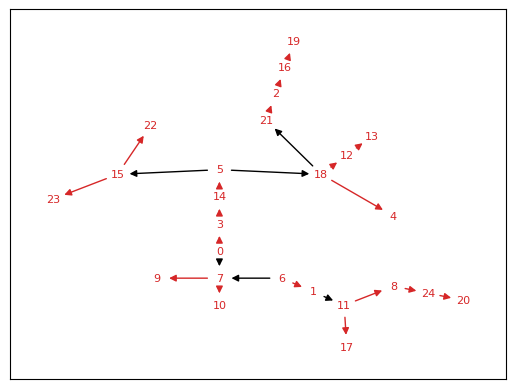

In [9]:
draw_tree(ones_tree, ones_layout)

In [10]:
util.path_cover_two(ones_tree)

{9: 0,
 10: 0,
 4: 0,
 22: 0,
 23: 0,
 17: 0,
 13: 0,
 20: 0,
 19: 0,
 16: 1,
 24: 1,
 2: 2,
 8: 2,
 21: 3,
 12: 1,
 11: 4,
 15: 2,
 18: 6,
 1: 4,
 5: 8,
 6: 5,
 14: 9,
 7: 7,
 3: 10,
 0: 18}